# Mnist Dense Training

网站：https://tensorflow.google.cn/alpha/tutorials/quickstart/beginner

In [1]:
import tensorflow as tf # tf2.0a
import numpy as np
import matplotlib.pyplot as plt

第一步上获取数据，处理数据，数据的采集转换是训练的基础
一般分为training data和testing data
Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 整数变成浮点数，输出是0-9，不用变成浮点数
x_train, x_test = x_train / 255.0, x_test / 255.0


11493376/11490434 [==============================] - 1116s 97us/step


In [3]:
# 打印输入图像的维度
print(x_train.shape)
print(x_train.dtype)
print(x_train.ndim)
print(type(x_train))
print(y_train.shape)

(60000, 28, 28)
float64
3
<class 'numpy.ndarray'>
(60000,)


图像的值为： 1


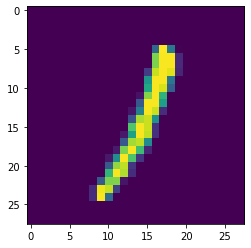

In [4]:
# 查看其中一个图像
# print(x_train[1,...])
x_index=99
#plt.imshow(x_train[x_index,...],cmap=plt.cm.gray)
plt.imshow(x_train[x_index,...])
print("图像的值为：",y_train[x_index])

使用keras API建立全连接神经网络模型

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # 展开第一层 用于神经网络输入
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# 显示模型
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


设置模型训练参数Configures the model for training. https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Model#compile
```
compile(
    optimizer,
    loss=None,
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    distribute=None,
    **kwargs
)
```


In [6]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

训练模型

In [7]:
model.fit(x_train, y_train, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6497 - accuracy: 0.8288
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2996 - accuracy: 0.9153
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2490 - accuracy: 0.9299
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2132 - accuracy: 0.9398
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1868 - accuracy: 0.9470


评估模型是否正确

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.1721 - accuracy: 0.9508


[0.17209154195934534, 0.9508]

用测试图像测试模型的效果

------输入一个数，获得概率输出----------
[[1.43734549e-04 1.16929435e-07 1.69576867e-03 4.24920488e-03
  5.45905863e-08 6.52863964e-05 1.90903897e-08 9.93778110e-01
  5.22419441e-06 6.25455505e-05]]
----------------
图像的值为： 7
----------------
预测结果: [7]


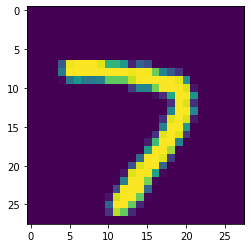

In [9]:
x_test_index=17 #8就会不成功
print('------输入一个数，获得概率输出----------')
print(model.predict(x_test[x_test_index,...][np.newaxis,:])) # 输入一个数，获得概率输出
print('----------------')
plt.imshow(x_test[x_test_index,...])
print("图像的值为：",y_test[x_test_index])
print('----------------')
print('预测结果:',model.predict_classes(x_test[x_test_index,...][np.newaxis,:])) # 输出分类

训练成功！